In [35]:
import numpy as np
import pandas as pd
from scipy import linalg
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import re
import itertools
import matplotlib.pyplot as plt

In [20]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

In [2]:
survey_64 = pd.read_csv('survey_64.csv')

In [16]:
no_float = [i for i in survey_64['T7'].tolist() if type(i) != float]
no_unclear = [i for i in no_float if '[unclear]' not in i]

## Some manipulation of data frames

In [30]:
embed = model.encode(no_unclear)
first = pd.DataFrame({'Response': no_unclear, 'Embedding': embed})
second = pd.DataFrame({'Response': no_unclear})

In [31]:
for i in range(0, 768):
    x = []
    for j in range(0, len(embed)):
        x.append(first['Embedding'][j][i])
    second['x'+str(i)] = x

In [33]:
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(second.iloc[:, 1:])
    Sum_of_squared_distances.append(km.inertia_)

In [37]:
second.iloc[:, 1:]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767
0,0.169956,0.576175,0.305210,0.889022,-0.359807,-0.387794,0.933715,-0.641727,0.713522,-1.128619,...,-0.462090,0.065172,0.193122,-1.231526,-0.355753,0.271332,-0.025952,-0.001147,0.166827,0.423498
1,0.131383,-0.240391,0.872917,0.483824,-1.149685,0.287035,0.585075,-0.262572,0.772228,-0.179391,...,-0.049259,0.576768,1.236887,-0.686872,-0.362478,0.570969,-0.175607,-0.501856,-0.860413,0.394548
2,-0.336062,-0.347913,-0.215168,0.729264,-0.766587,-0.211024,0.488620,0.289370,0.190472,-0.612177,...,-0.478334,0.109539,0.124973,-2.683815,-0.385821,0.323180,-0.276944,0.872119,-0.232831,0.868794
3,-0.108661,0.008074,-0.312805,0.250400,-0.710667,-0.460732,0.253226,0.303875,0.448702,-0.627768,...,-0.856360,-0.827714,-0.220486,-1.702027,-0.264303,-0.171331,-0.294635,0.232949,0.300349,-0.145932
4,0.202235,0.478864,0.212403,-0.135441,0.298303,-0.182391,0.193854,-0.169043,0.185456,-0.668663,...,-0.031739,-0.189298,-0.570148,-0.848234,0.965863,0.025384,0.185034,-0.278376,-0.574915,0.006843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,0.422435,-0.523383,-0.048366,0.249393,-0.729626,-0.819896,-0.019681,0.065669,-0.316154,-0.162621,...,0.766289,-0.158326,0.397813,-1.147401,-0.074544,-0.702686,-0.212448,-0.118723,0.805383,-0.298062
934,0.004569,0.150438,-0.207117,0.401260,-0.405728,0.456007,0.582399,-0.261857,-0.204962,-0.776692,...,0.111398,0.805110,0.175557,-1.681098,-0.283668,0.601449,-0.601398,0.697961,-0.061390,0.729452
935,-0.142834,-0.150794,0.769273,0.346001,0.188962,-0.919640,-0.532713,-0.325364,-0.237032,-1.083120,...,-0.615761,-0.413269,-0.181996,-1.589621,-0.439484,0.243537,-0.400073,0.778823,-0.366554,0.271805
936,0.358985,0.332561,0.529290,0.347675,0.084945,-0.009618,0.392272,-0.130498,0.131663,-0.909231,...,-0.964824,-0.153928,-0.341028,-0.934732,-0.726718,-0.285805,-0.381136,0.837451,-0.504374,0.504956


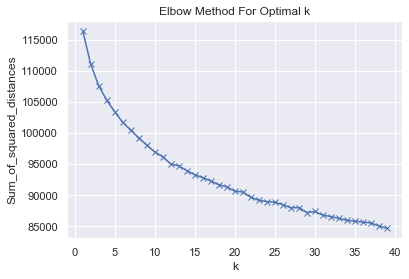

In [36]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=12).fit(second.iloc[:, 1:])

In [41]:
first['Cluster'] = [i for i in kmeans.labels_]

In [44]:
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())
first

,Response,Embedding,Cluster,bag
0,There is such a thing as prejudice in this arm...,"[0.1699564, 0.57617515, 0.30521023, 0.8890215,...",8,"[there, is, such, a, thing, as, prejudice, in,..."
1,I'll like to go into combat and fight. That's ...,"[0.13138291, -0.24039118, 0.8729173, 0.4838235...",8,"[i'll, like, to, go, into, combat, and, fight...."
2,I think the army would be a lot better if the ...,"[-0.33606243, -0.34791276, -0.21516825, 0.7292...",2,"[i, think, the, army, would, be, a, lot, bette..."
3,I think some outfits get more breaks than othe...,"[-0.10866141, 0.00807412, -0.31280532, 0.25040...",5,"[i, think, some, outfits, get, more, breaks, t..."
4,As a quarter master outfit I feel like we shou...,"[0.20223469, 0.47886428, 0.21240284, -0.135440...",3,"[as, a, quarter, master, outfit, i, feel, like..."
...,...,...,...,...
933,besides the coal strikes which grief me extrem...,"[0.42243466, -0.52338254, -0.048366357, 0.2493...",5,"[besides, the, coal, strikes, which, grief, me..."
934,The army as a whole does very well. I expect a...,"[0.004569292, 0.15043795, -0.20711683, 0.40125...",2,"[the, army, as, a, whole, does, very, well., i..."
935,The Army Technical School to my opinion could ...,"[-0.1428335, -0.150794, 0.76927316, 0.34600088...",3,"[the, army, technical, school, to, my, opinion..."
936,Many of these questions don't apply to our squ...,"[0.358985, 0.33256057, 0.52928954, 0.34767458,...",3,"[many, of, these, questions, don't, apply, to,..."


## TFIDF Step

In [46]:
g = first.groupby('Cluster')
g.size().head()

Cluster
0    117
1     62
2    112
3     91
4     29
dtype: int64

In [48]:
pd.Series(first.bag[0]).value_counts()

that         3
we           3
one          2
the          2
thing        2
and          2
stand        1
or           1
to           1
such         1
country      1
fall.        1
a            1
united       1
dirty        1
hatred.      1
as           1
is           1
prejudice    1
better       1
-            1
all          1
so           1
in           1
this         1
damn         1
we're        1
german       1
lousy        1
learn        1
quicker      1
wop          1
be.          1
fighting     1
separate     1
army         1
cooperate    1
racist       1
there        1
we'll        1
jew          1
off          1
for          1
dtype: int64

In [49]:
TF = first.bag.apply(lambda bag : pd.Series(bag).value_counts())
TF

,that,we,one,the,thing,and,stand,or,to,such,...,democratic,caste,divides,supposedly,chairs,[underline]men[/underline],stupid,enforced.,meets,"civilians,"
0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,2.0,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
935,1.0,NaN,NaN,3.0,NaN,NaN,1.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
936,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
g = first.groupby('Cluster')
g.size()

Cluster
0     117
1      62
2     112
3      91
4      29
5      97
6      58
7      80
8      72
9      63
10     71
11     86
dtype: int64

In [51]:
clusters = g.aggregate(lambda listofbags: 
                list(itertools.chain.from_iterable(listofbags)))


In [52]:
clusters = g.bag.aggregate(lambda listofbags: list(itertools.chain.from_iterable(listofbags)))
clusters

Cluster
0     [officers, &, non-coms, (non-commissioned, off...
1     [the, rest, of, my, company, all, but, 23, of,...
2     [i, think, the, army, would, be, a, lot, bette...
3     [as, a, quarter, master, outfit, i, feel, like...
4     [at, this, time, there, is, little, i, can, ad...
5     [i, think, some, outfits, get, more, breaks, t...
6     [i, should, think, every, soldier, should, hav...
7     [i, think, that, when, a, man, is, inducted, i...
8     [there, is, such, a, thing, as, prejudice, in,...
9     [i, have, been, in, the, army, nine, momts, an...
10    [when, i, was, inducted, my, mother, and, fath...
11    [there, is, too, much, flexibility, in, the, r...
Name: bag, dtype: object

In [53]:
TF = clusters.apply(lambda bag : pd.Series(bag).value_counts())
TF

,the,to,a,of,i,is,in,and,they,are,...,feeding,canned,sections,pasture,haircut,awful,needless,picks.,masters,promotion.
Cluster,,,,,,,,,,,,,,,,,,,,,
0,330.0,157.0,150.0,140.0,134.0,130.0,123.0,111.0,84.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96.0,93.0,117.0,40.0,102.0,35.0,44.0,59.0,44.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,357.0,187.0,211.0,159.0,145.0,103.0,151.0,150.0,102.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,230.0,170.0,158.0,119.0,178.0,65.0,138.0,109.0,45.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45.0,14.0,20.0,10.0,29.0,23.0,16.0,20.0,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,287.0,201.0,163.0,129.0,147.0,110.0,153.0,127.0,75.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,105.0,73.0,86.0,31.0,96.0,29.0,62.0,49.0,29.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,172.0,130.0,125.0,64.0,188.0,57.0,102.0,79.0,20.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,135.0,110.0,73.0,43.0,79.0,29.0,57.0,66.0,26.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
IDF = np.log(len(TF)/TF.count())
IDF.sort_values()

the           0.000000
feel          0.000000
now           0.000000
could         0.000000
from          0.000000
                ...   
lustful       2.484907
radio.        2.484907
[physical]    2.484907
(see          2.484907
promotion.    2.484907
Length: 5472, dtype: float64

In [55]:
TFIDF = TF * IDF
TFIDF

,the,to,a,of,i,is,in,and,they,are,...,feeding,canned,sections,pasture,haircut,awful,needless,picks.,masters,promotion.
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
final = TFIDF.fillna(0)

In [58]:
np.argsort(np.array(final.loc[2]))[-4:]

array([1905, 1906, 1894,   12], dtype=int64)

In [59]:
np.argsort(np.array(final.loc[0]))[-4:]

array([ 81, 170,  16, 133], dtype=int64)

In [60]:
(final.loc[:0].values.tolist())[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.742750881315559,
 0.0,
 5.5687281273363,
 0.0,
 0.0,
 0.0,
 9.663042510079594,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.78436406366815,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0882730477511124,
 0.0,
 0.0,
 0.0,
 1.914250293771853,
 3.8287526926730466,
 0.0,
 1.7402275397925937,
 0.0,
 0.0,
 0.0,
 1.5662047858133343,
 0.0,
 0.0,
 0.0,
 1.5662047858133343,
 0.0,
 0.0,
 0.0,
 1.3051706548444453,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0441365238755562,
 0.0,
 1.0441365238755562,
 0.0,
 0.0,
 2.187858681527455,
 0.0,
 0.0,
 1.0441365238755562,
 2.0055371247335003,
 7.6246189861593985,
 5.928961508059556,
 0.9571251468859265,
 0.0,
 0.0,
 0.9571251468859265,
 0.0,
 0.9571251468859265,
 1.8232155679395459,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7831023929066672,
 0.7831023929066672,
 0.7831023929066672,
 0.0,
 0.0,
 6.238324625039508,
 0.0,
 0.

## Making dataframe of 4 word dictionaries

In [63]:
listoflists = []
for i in range(0, 12):
    listoflists.append([final.loc[i].index[j] for j in np.argsort(np.array(final.loc[i]))[-4:]])

In [64]:
[(final.loc[:8].values.tolist())[0][j] for j in list(np.argsort(np.array(final.loc[:8].values.tolist())[0])[-4:])]

[7.6246189861593985, 8.958797346140274, 9.663042510079594, 12.542316284596385]

In [69]:
dictionary = pd.DataFrame({'Cluster': range(0, 12), 'Individual Dictionary': listoflists})

In [70]:
dictionary

,Cluster,Individual Dictionary
0,0,"[officer, non-coms., officers, dislike]"
1,1,"[returns, harder., possible., married]"
2,2,"[expense, hanging, himself, men]"
3,3,"[airplane, instructors, technical, school.]"
4,4,"[leaders, improved., general,, expected.]"
5,5,"[place., shortage., thousands, crowded.]"
6,6,"[[insertion][/insertion], coupons, hall, 11]"
7,7,"[branch, artillery, volunteered, corp,]"
8,8,"[peacetime, jews., countries, terms]"
9,9,"[unit,, ---, run., answers]"


## Getting largest cosine similarity

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

In [110]:
def pick_cluster(keyword, dataframe, num_clusters):# dataframe must be in format of TFIDF
    from sklearn.metrics.pairwise import cosine_similarity
    final = dataframe.fillna(0)
    listoflists = []
    for i in range(0, num_clusters):
        listoflists.append([final.loc[i].index[j] for j in np.argsort(np.array(final.loc[i]))[-4:]])
    dictionary = pd.DataFrame({'Cluster': range(0, num_clusters), 'Individual Dictionary': listoflists})
    
    averages = []
    for j in dictionary["Individual Dictionary"]:
        first = model.encode(keyword)[0]
        second = [model.encode(i)[0] for i in j]
        temp = np.mean([cosine_similarity(np.array([first]), np.array([k])) for k in second])
        averages.append(temp)
    print('Use cluster ' + str(np.argmax(averages)))
    return np.argmax(averages)

In [93]:
largest_average('food', final, 12)

Use cluster 11


11

In [100]:
first['Response'][first['Cluster'] == 11].tolist()

['There is too much flexibility in the rules and regulations, no two officers see the rules the same way and therefore one outfit will benefit with little privileges and the other outfit will be denied the same ones, this causes a drop in morale of some soldiers when they are stationed in the same post. A little more care should be taken in the selection of men for the kitchen some are competent but do not know how to handle men, others know how to handle men but do not know how to cook or do ',
 "The army could be better if they give us the right training and the right food (the food is the same all the time). [paragraph] They shouldn't be selling bonds to the men in uniform but they make you take a bond they talk you into it to buy bonds,.",
 'Our Army could Mess Sergeants who can explain a job better - and just because some Joe has been "hanging" around a comp for years is no reason why he should think he is a general. (paragraph) Goldbricks ought to be given K.P. (Kitchen Patrol) t

In [112]:
pick_cluster('training', final, 12)

Use cluster 3


3

In [113]:
first['Response'][first['Cluster'] == 3].tolist()

['As a quarter master outfit I feel like we should get more experience at Driving. I have fund in the army over 7 months an have only drove a truck about 75 miles, and if I am going to be a good truck driver I need more experience.',
 'Officers should have a full basic training before going to O.C.S. A truck outfit should have truck drivers as personell also enough manachks to teach others how to repairs trucks & drive them. A truck outfit should have gas to run the trucks with. How far does 8 truck go with 120 men.',
 "I think our Regiment is best suited for the Alcan Highway that is the best training we have had. When this Regiment was first activated it was scheduled to go there and one had some good training but since then it has just been Infantry training which I can't see for for a truck Regiment. I enlisted in the Air Corps as a mechanic but since I have been in the Army I haven't touched a wrench. I don't think it is fair the way some of the men ",
 'We have much more close or

In [116]:
pick_cluster('education', final, 12)

Use cluster 2


2

In [117]:
first['Response'][first['Cluster'] == 2].tolist()

["I think the army would be a lot better if the officers had more training & so much time wasn't wasted just hanging around. I think just hanging around doing nothing brings about most of the discontentment in the army & I also think most of us soldiers feel that the war is just another way of throwing away money.",
 'This Army is run by Officers who, as long as they get passes and privileges, dont give a darn about whether the enlisted man gets the same treatment or not! There is entirely too much politics in the Army, and the men should be treated as men, instead of puppets which the Officers can do with as they please. There is also entirely too much favoritism shown to a few men..',
 "The Private should get more than $50 a month because they need as much money as a corporal. and a man shouldn't be changed from his buddies after he's been with them 8 or 9 months in the army without a good reason.",
 'I do honestly think that the men could be segregated according to personality, inte